In [1]:
!git clone 'https://github.com/wanderer799/cuddly-succotash.git'

Cloning into 'cuddly-succotash'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 6), reused 19 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/cuddly-succotash/Dataset/cardio_train.csv',sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


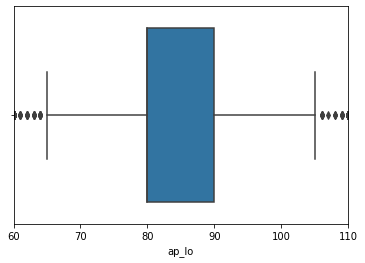

In [6]:
fig, ax = plt.subplots()
ax.set_xlim(60, 110) 
sns.boxplot(x = df['ap_lo'], data = df, ax=ax)
plt.show()

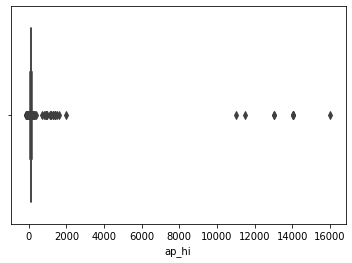

In [7]:
sns.boxplot(x = df['ap_hi'], data = df)

In [8]:
#Diastolic
new_df=df[(df['ap_hi']>90) & (df['ap_hi']<170) & (df['ap_lo']>63) & (df['ap_lo']<108)]

In [9]:
new_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


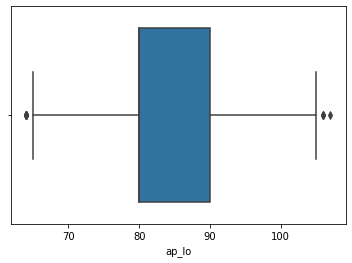

In [10]:
sns.boxplot(x = new_df['ap_lo'], data = new_df)

In [11]:
new_df['age'] = (new_df['age']/365).astype(int)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0


In [12]:
new_df['gender']=pd.get_dummies(new_df['gender'],drop_first=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
new_df=new_df.drop(['id'],axis=1)

In [14]:
new_df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.034290,-0.090626,0.040942,0.197858,0.139279,0.151872,0.095127,-0.050805,-0.030163,-0.010181,0.230959
gender,-0.034290,1.000000,0.496440,0.152364,0.041035,0.047097,-0.041778,-0.023815,0.336670,0.169017,0.005984,-0.003384
height,-0.090626,0.496440,1.000000,0.288635,-0.003668,0.013132,-0.055372,-0.021806,0.186273,0.093815,-0.009567,-0.020637
weight,0.040942,0.152364,0.288635,1.000000,0.236157,0.214727,0.134607,0.100340,0.067567,0.065249,-0.015476,0.162270
ap_hi,0.197858,0.041035,-0.003668,0.236157,1.000000,0.704824,0.192074,0.088484,0.023083,0.027593,0.002234,0.430201
ap_lo,0.139279,0.047097,0.013132,0.214727,0.704824,1.000000,0.155327,0.066781,0.021073,0.031418,0.000124,0.332031
cholesterol,0.151872,-0.041778,-0.055372,0.134607,0.192074,0.155327,1.000000,0.452510,0.007922,0.030363,0.009485,0.218622
gluc,0.095127,-0.023815,-0.021806,0.100340,0.088484,0.066781,0.452510,1.000000,-0.006260,0.007957,-0.007415,0.085905
smoke,-0.050805,0.336670,0.186273,0.067567,0.023083,0.021073,0.007922,-0.006260,1.000000,0.341244,0.023790,-0.019563
alco,-0.030163,0.169017,0.093815,0.065249,0.027593,0.031418,0.030363,0.007957,0.341244,1.000000,0.024229,-0.011968


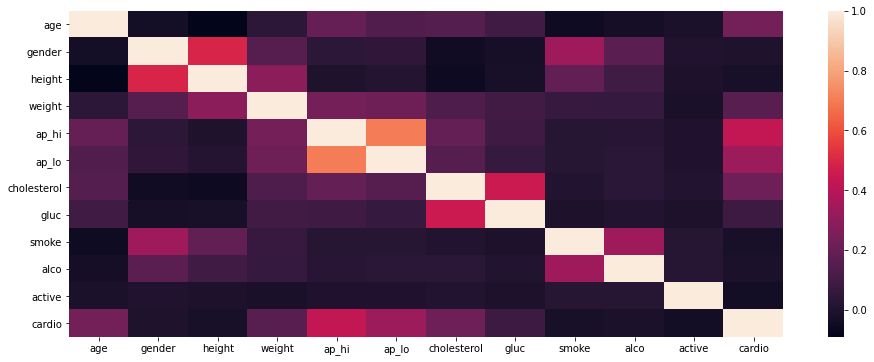

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(new_df.corr())

In [16]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()


In [17]:
new_df[['age','height','weight','cholesterol','ap_hi','ap_lo']]=ms.fit_transform(new_df[['age','height','weight','cholesterol','ap_hi','ap_lo']])

In [18]:
new_df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.034290,-0.090626,0.040942,0.197858,0.139279,0.151872,0.095127,-0.050805,-0.030163,-0.010181,0.230959
gender,-0.034290,1.000000,0.496440,0.152364,0.041035,0.047097,-0.041778,-0.023815,0.336670,0.169017,0.005984,-0.003384
height,-0.090626,0.496440,1.000000,0.288635,-0.003668,0.013132,-0.055372,-0.021806,0.186273,0.093815,-0.009567,-0.020637
weight,0.040942,0.152364,0.288635,1.000000,0.236157,0.214727,0.134607,0.100340,0.067567,0.065249,-0.015476,0.162270
ap_hi,0.197858,0.041035,-0.003668,0.236157,1.000000,0.704824,0.192074,0.088484,0.023083,0.027593,0.002234,0.430201
ap_lo,0.139279,0.047097,0.013132,0.214727,0.704824,1.000000,0.155327,0.066781,0.021073,0.031418,0.000124,0.332031
cholesterol,0.151872,-0.041778,-0.055372,0.134607,0.192074,0.155327,1.000000,0.452510,0.007922,0.030363,0.009485,0.218622
gluc,0.095127,-0.023815,-0.021806,0.100340,0.088484,0.066781,0.452510,1.000000,-0.006260,0.007957,-0.007415,0.085905
smoke,-0.050805,0.336670,0.186273,0.067567,0.023083,0.021073,0.007922,-0.006260,1.000000,0.341244,0.023790,-0.019563
alco,-0.030163,0.169017,0.093815,0.065249,0.027593,0.031418,0.030363,0.007957,0.341244,1.000000,0.024229,-0.011968


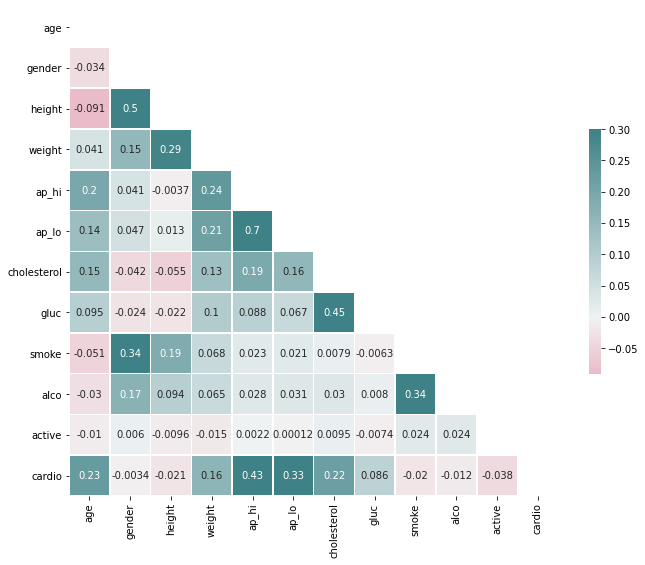

In [19]:
corr=new_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(1,200, as_cmap=True)


g=sns.heatmap(corr, data=new_df,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot  = True)
g.figure.set_size_inches(11,9)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=new_df.drop(['cardio'],axis=1)

In [22]:
y=new_df['cardio']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

df_scaled = ms.fit_transform(new_df[cont_cols])


df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,age,height,weight,ap_hi,ap_lo
0,0.600000,0.579487,0.269841,0.202703,0.372093
1,0.742857,0.517949,0.391534,0.608108,0.604651
2,0.628571,0.564103,0.280423,0.472973,0.139535
3,0.542857,0.584615,0.375661,0.743243,0.837209
4,0.885714,0.492308,0.296296,0.337838,0.372093


In [ ]:
for col in ord_cols:
    dummies = pd.get_dummies(new_df[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    df_normalized = pd.concat([df_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

    
df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_0.5,cholesterol_1.0,gluc_2,gluc_3
0,0.600000,0.579487,0.269841,0.202703,0.372093,0.0,0.0,0.0,0.0
1,0.742857,0.517949,0.391534,0.608108,0.604651,0.0,1.0,0.0,0.0
2,0.628571,0.564103,0.280423,0.472973,0.139535,0.0,1.0,0.0,0.0
3,0.542857,0.584615,0.375661,0.743243,0.837209,0.0,0.0,0.0,0.0
4,0.885714,0.492308,0.296296,0.337838,0.372093,NaN,NaN,NaN,NaN


In [ ]:
df_normalized = pd.concat([df_normalized, new_df[bin_cols]], axis=1)
df_normalized['gender'] -= 1 

df_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_0.5,cholesterol_1.0,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.600000,0.579487,0.269841,0.202703,0.372093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.742857,0.517949,0.391534,0.608108,0.604651,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0
2,0.628571,0.564103,0.280423,0.472973,0.139535,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
3,0.542857,0.584615,0.375661,0.743243,0.837209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.885714,0.492308,0.296296,0.337838,0.372093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('cardio', axis=1)
y = df_normalized['cardio']


(58174, 14)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [24]:
from sklearn import *
from lightgbm import LGBMClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [33]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
t = time.time()
clf = lgb.train(params, d_train, 100)
print(f'Done, time = {time.time() - t}')

Done, time = 0.4365816116333008


In [34]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
# predict the results
y_pred=clf.predict(X_test)

In [36]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7319


In [37]:
y_pred_train = clf.predict(X_train)

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7399


In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7399
Test set score: 0.7319


In [40]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4986 1462]
 [1959 4355]]

True Positives(TP) =  4986

True Negatives(TN) =  4355

False Positives(FP) =  1462

False Negatives(FN) =  1959


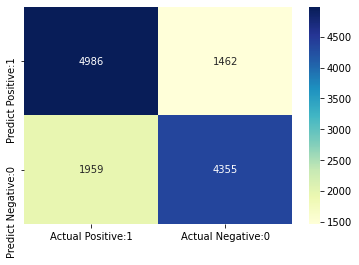

In [41]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6448
           1       0.75      0.69      0.72      6314

    accuracy                           0.73     12762
   macro avg       0.73      0.73      0.73     12762
weighted avg       0.73      0.73      0.73     12762



In [45]:
import joblib
joblib_file = "/content/lgb_cardio_dummy.pkl"  
joblib.dump(clf, joblib_file)

['/content/lgb_cardio_dummy.pkl']

In [ ]:
from sklearn import svm,metrics
clf = svm.SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def evaluate_model(clf, X_test, y_test):

    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))


In [ ]:
evaluate_model(clf, X_test, y_test)


Accuracy: 0.5931241942415126
Precision: 0.631483870967742
Recall: 0.42534329914827046


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=1)


Epoch 1/15
2909/2909 [==============================] - 38s 7ms/step - loss: 0.7010 - accuracy: 0.5616
Epoch 2/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6716 - accuracy: 0.5802
Epoch 3/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6719 - accuracy: 0.5818
Epoch 4/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6697 - accuracy: 0.5855
Epoch 5/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6704 - accuracy: 0.5830
Epoch 6/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6699 - accuracy: 0.5841
Epoch 7/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6700 - accuracy: 0.5850
Epoch 8/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6693 - accuracy: 0.5841
Epoch 9/15
2909/2909 [==============================] - 21s 7ms/step - loss: 0.6683 - accuracy: 0.5911
Epoch 10/15
2909/2909 [==============================] - 21s 7ms/step - l

In [ ]:
# make class predictions with the model
predictions = model.predict_classes(X)

In [ ]:
predictions

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)